In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 3, 3, 1)


C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


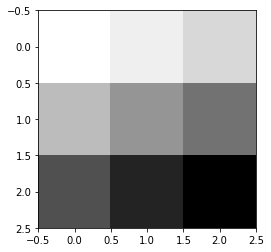

In [5]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]], 
                   [[4], [5], [6]], 
                   [[7], [8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap = 'Greys')

In [6]:
print(image.shape)

(1, 3, 3, 1)


### 1 filter (2, 2, 1, 1) with padding : VALID

In [7]:
weight = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
print(weight.shape)

(2, 2, 1, 1)


In [40]:
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'VALID')

In [41]:
conv2d_img = conv2d.eval()
print(conv2d_img)

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [42]:
print(conv2d_img.shape)

(1, 2, 2, 1)


In [43]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print(conv2d_img)

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


[[12. 16.]
 [24. 28.]]


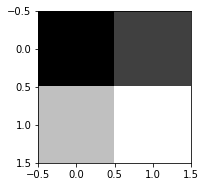

In [47]:
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap = 'gray')

### 1 filter (2, 2, 1, 1) with padding : SAME

In [50]:
print(image)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


In [48]:
print(image.shape)

(1, 3, 3, 1)


In [51]:
weight = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
print(weight.shape)

(2, 2, 1, 1)


In [52]:
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()

In [55]:
print(conv2d_img)

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


In [54]:
print(conv2d_img.shape)

(1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


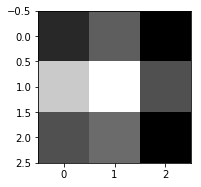

In [58]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap = 'gray')

### 3 filters (2, 2, 1, 3)

In [59]:
print(image.shape)

(1, 3, 3, 1)


In [60]:
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]], 
                      [[[1., 10., -1.]], [[1., 10., -1.]]]])
print(weight.shape)

(2, 2, 1, 3)


In [61]:
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()

In [62]:
print(conv2d_img)

[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]


In [63]:
print(conv2d_img.shape)

(1, 3, 3, 3)


In [64]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


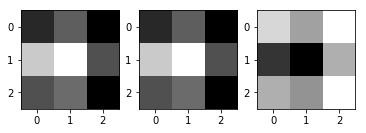

In [68]:
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap = 'gray')

In [69]:
image = np.array([[[[4], [3]], 
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], 
                      strides = [1, 1, 1, 1], padding = 'VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


In [70]:
image = np.array([[[[4], [3]], 
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], 
                      strides = [1, 1, 1, 1], padding = 'SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [71]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [73]:
img = mnist.train.images[0]
img.shape

(784,)

In [75]:
img = img.reshape(28, 28)
img.shape

(28, 28)

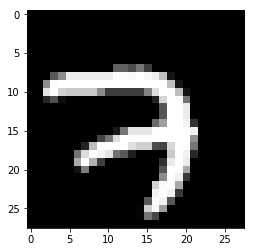

In [77]:
plt.imshow(img, cmap = 'gray')

C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_5:0", shape=(1, 14, 14, 5), dtype=float32)


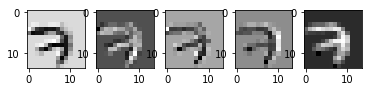

In [80]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev = 0.01))
conv2d = tf.nn.conv2d(img, W1, strides = [1, 2, 2, 1], padding = 'SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img) :
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(14, 14), cmap = 'gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


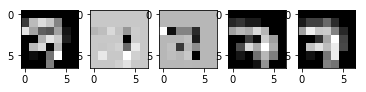

In [82]:
pool = tf.nn.max_pool(conv2d, ksize = [1, 2, 2, 1], strides =[1, 2, 2, 1], padding = 'SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img) :
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(7, 7), cmap = 'gray')